In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [27]:
DATA_DIR = "../../data"

data  = pd.read_csv(f'{DATA_DIR}/aita_clean_with_age_and_gender_fixed.csv')

In [28]:
data.loc[data["edited"] == 'False', "edited"] = 0
data.loc[data["edited"] != 0, "edited"] = 1
del data["id"]


      edited  score  num_comments  is_asshole  age  is_male  is_female
0          0     12           5.0           0   21        1          0
1          0      8          10.0           0   19        1          0
2          1     23          68.0           0   28        1          0
3          0     10           5.0           0   16        1          0
4          1     10          11.0           0   13        1          0
...      ...    ...           ...         ...  ...      ...        ...
10448      1      6          18.0           0   22        0          1
10449      0      4          17.0           0   24        1          0
10450      1     16          23.0           0   15        1          0
10451      1   1373         304.0           0   32        0          1
10452      0      5          21.0           0   23        0          1

[10453 rows x 7 columns]


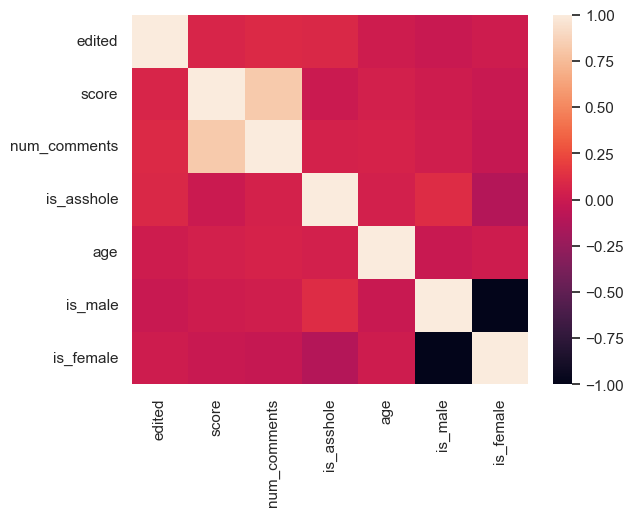

In [29]:
# the columns are id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,gender,age
# generate me a heatmap of the correlation between the columns
data_without_text_and_dates = data.drop(columns=["title", "body","timestamp","verdict"])
data_without_text_and_dates["is_male"] = data_without_text_and_dates["gender"].apply(lambda x: 1 if x == "male" else 0)
data_without_text_and_dates["is_female"] = data_without_text_and_dates["gender"].apply(lambda x: 1 if x == "female" else 0)
del data_without_text_and_dates["gender"]
print(data_without_text_and_dates)
corr = data_without_text_and_dates.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


In [5]:
# print the correlation between the gender and the is_asshole column
print("Male corr with asshole: ",data_without_text_and_dates["is_asshole"].corr(data_without_text_and_dates["is_male"]))
print("Female corr with asshole: ",data_without_text_and_dates["is_asshole"].corr(data_without_text_and_dates["is_female"]))

Male corr with asshole:  0.11431774350491739
Female corr with asshole:  -0.11431774350491739


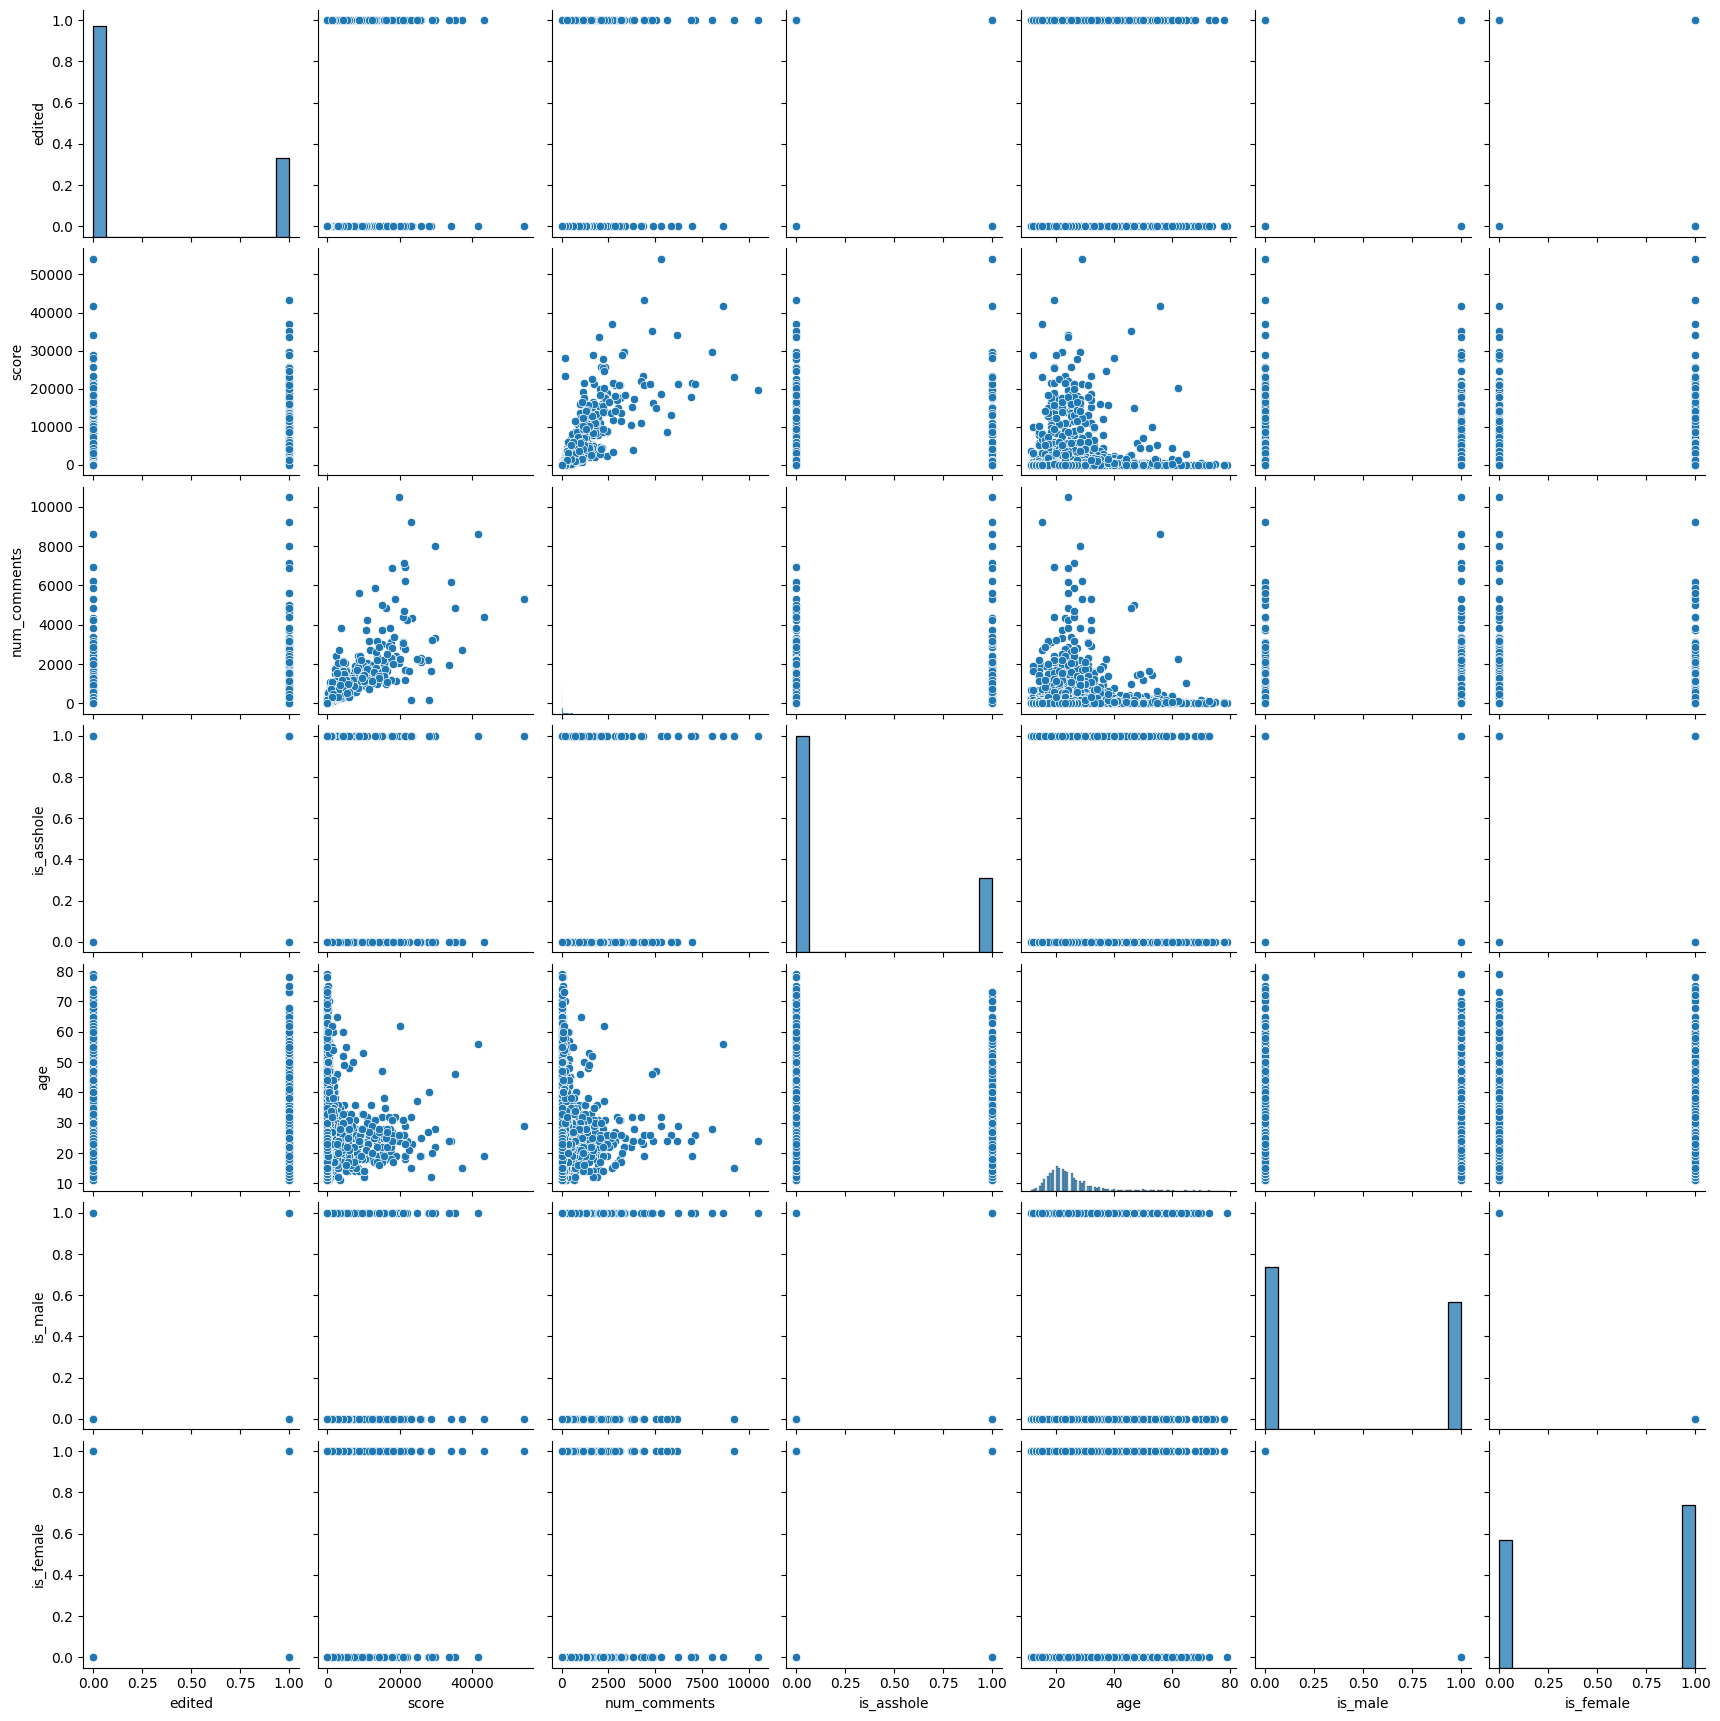

In [6]:
# graph more 
sns.pairplot(data_without_text_and_dates)
plt.show()


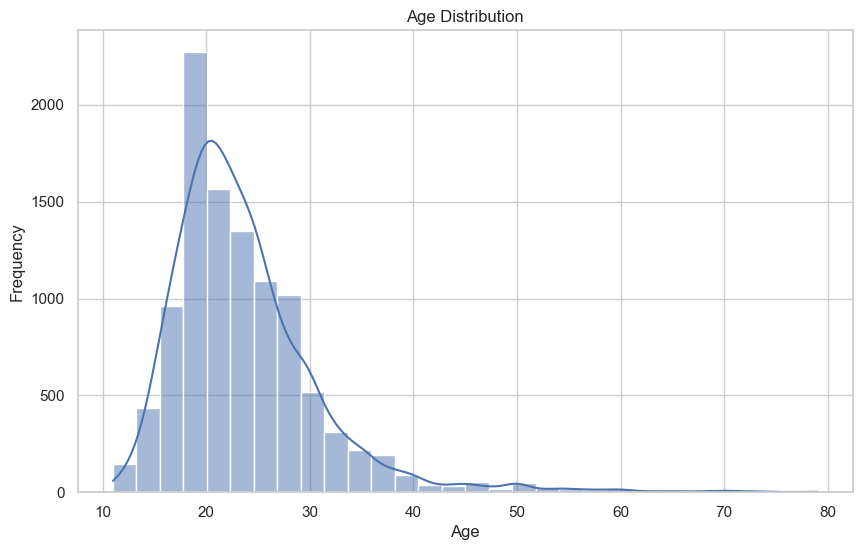

/var/folders/c4/wctb__gj70v0_v8tlv9zqdnr0000gn/T/ipykernel_13841/4100337972.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='Set2')


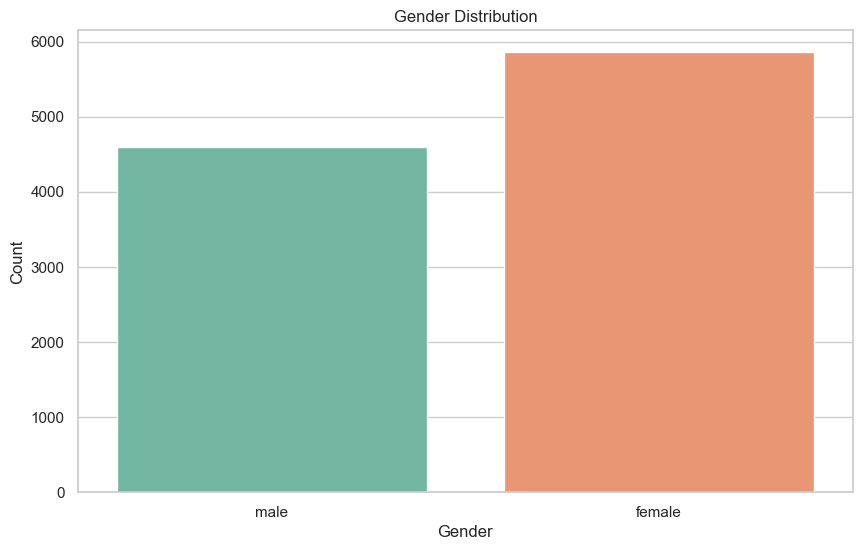

/var/folders/c4/wctb__gj70v0_v8tlv9zqdnr0000gn/T/ipykernel_13841/4100337972.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=data, palette='Set2')


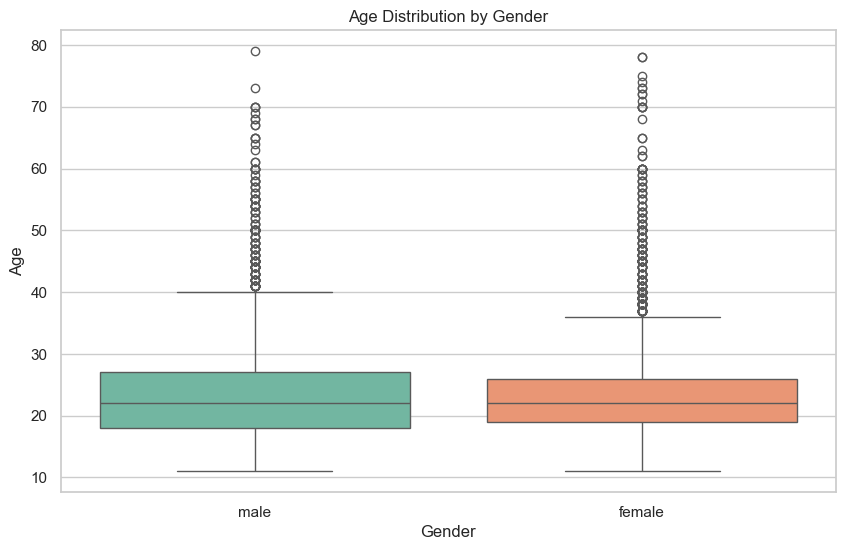

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar Plot of Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Box Plot of Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=data, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [10]:
print(data[['score', 'num_comments', 'age']].describe())


              score  num_comments           age
count  10453.000000  10453.000000  10453.000000
mean     382.972161    100.095188     23.695016
std     2129.225980    379.657910      7.258892
min        3.000000      3.000000     11.000000
25%        5.000000     15.000000     19.000000
50%       11.000000     26.000000     22.000000
75%       47.000000     52.000000     27.000000
max    54137.000000  10489.000000     79.000000


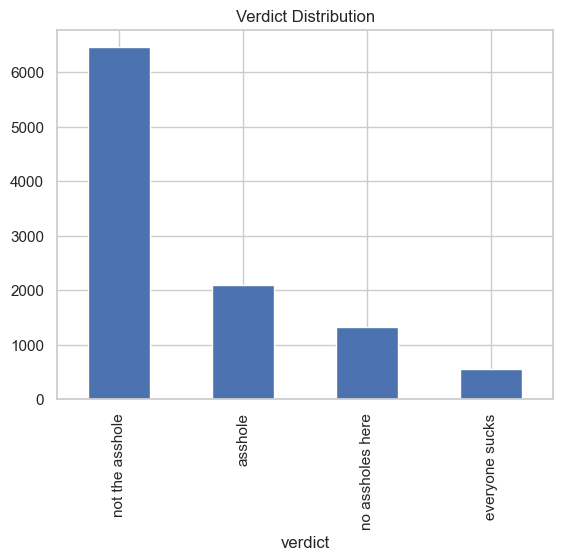

In [13]:
import matplotlib.pyplot as plt

# Bar charts for categorical data
data['verdict'].value_counts().plot(kind='bar')
plt.title('Verdict Distribution')
plt.show()


In [15]:
# Counts of 'is_asshole' by 'gender'
gender_asshole_counts = data.groupby(['gender', 'is_asshole']).size().unstack(fill_value=0)
print(gender_asshole_counts)


is_asshole     0     1
gender                
female      4625  1235
male        3164  1429


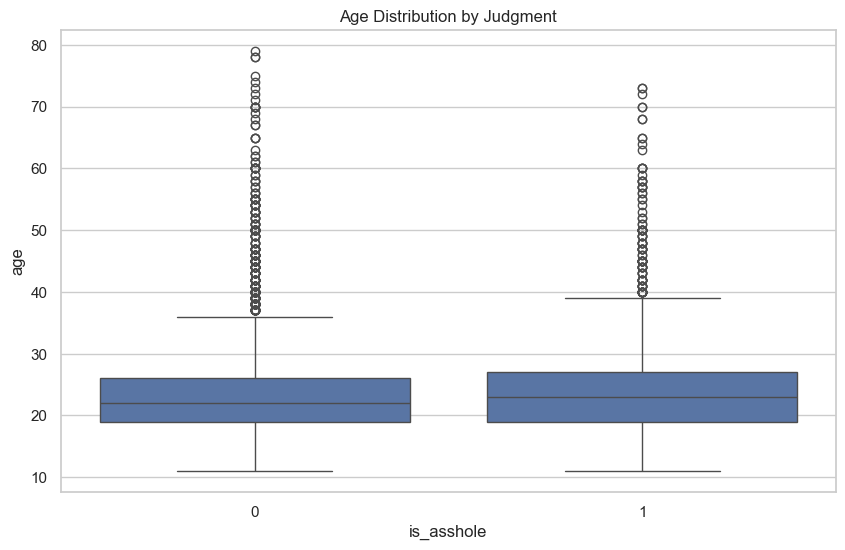

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of age by 'is_asshole' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_asshole', y='age', data=data)
plt.title('Age Distribution by Judgment')
plt.show()


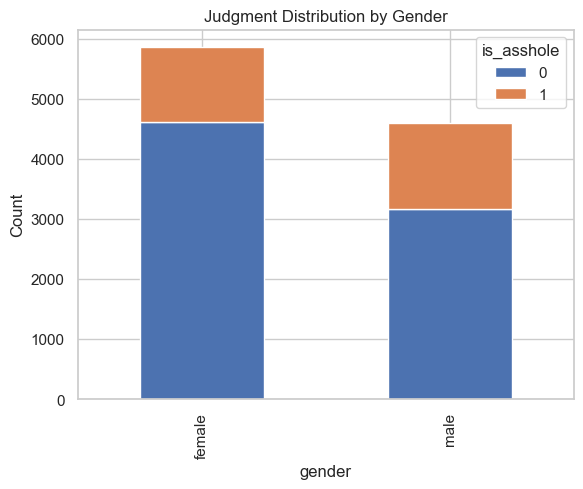

In [17]:
# Bar plot of 'is_asshole' counts by 'gender'
gender_asshole_counts.plot(kind='bar', stacked=True)
plt.title('Judgment Distribution by Gender')
plt.ylabel('Count')
plt.show()


The p-value you've reported, 
1.92×10^−31, is extremely small. In the context of a Chi-square test, this p-value indicates that there is a statistically significant association between the variables gender and is_asshole in your dataset. 

In [20]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2, p, dof, expected = chi2_contingency(gender_asshole_counts)
print('Chi-square test p-value:', p)


Chi-square test p-value: 1.9189532486187065e-31


In [31]:
print(data_without_text_and_dates.columns)
copy_data = data_without_text_and_dates.copy()
del copy_data["score"]
del copy_data["edited"]
del copy_data["num_comments"]

Index(['edited', 'score', 'num_comments', 'is_asshole', 'age', 'is_male',
       'is_female'],
      dtype='object')


In [33]:
print(copy_data.columns)


Index(['is_asshole', 'age', 'is_male', 'is_female'], dtype='object')


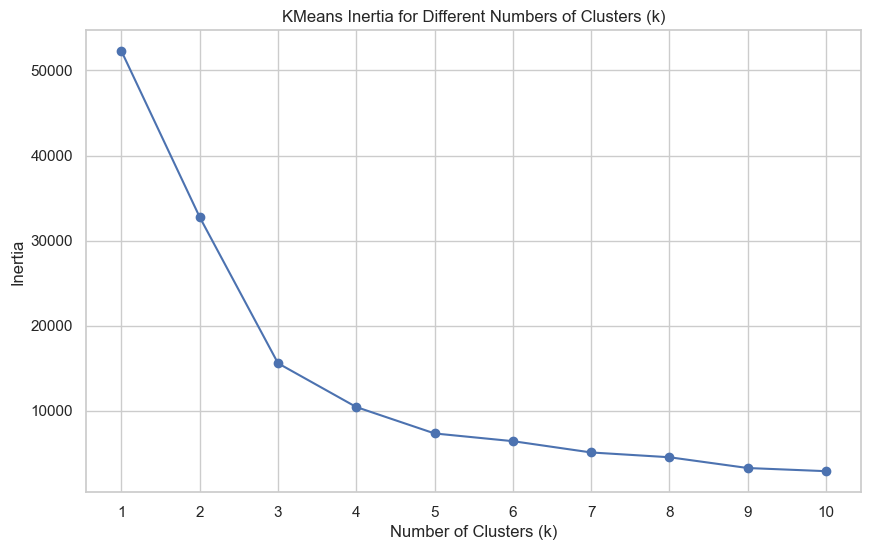

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assume 'df' is your DataFrame

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(copy_data)


ks = range(1, 11)  # Typically, k values from 1 to 10 are enough for initial analysis
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(ks, inertias, marker='o')
plt.title('KMeans Inertia for Different Numbers of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()



         is_asshole        age  is_male  is_female
cluster                                           
0          1.000000  24.121064      1.0        0.0
1          0.210751  23.758362      0.0        1.0
2          0.000000  23.385272      1.0        0.0


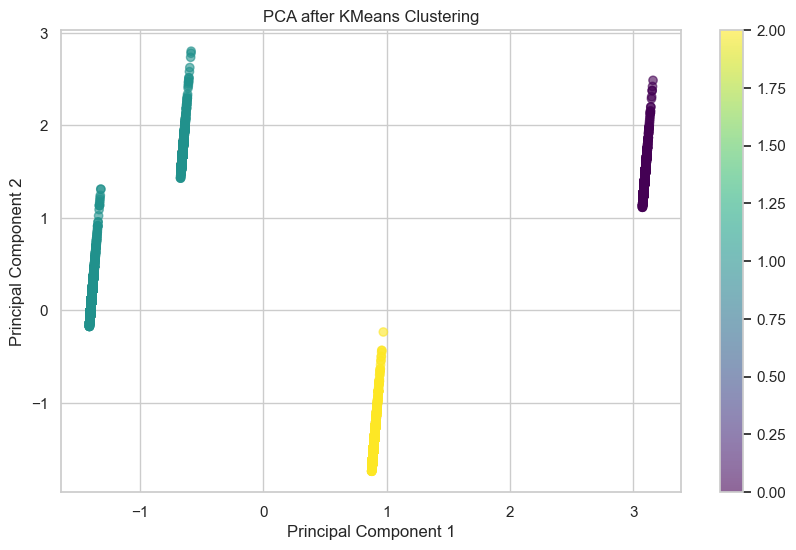

In [40]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
copy_data['cluster'] = kmeans.fit_predict(features_scaled)

# Calculate cluster characteristics
cluster_characteristics_kmeans = copy_data.groupby('cluster').mean()
print(cluster_characteristics_kmeans)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=copy_data['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA after KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

         is_asshole        age  is_male  is_female
cluster                                           
0               1.0  24.121064      1.0        0.0
1               0.0  23.592216      0.0        1.0
2               0.0  23.385272      1.0        0.0
3               1.0  24.380567      0.0        1.0


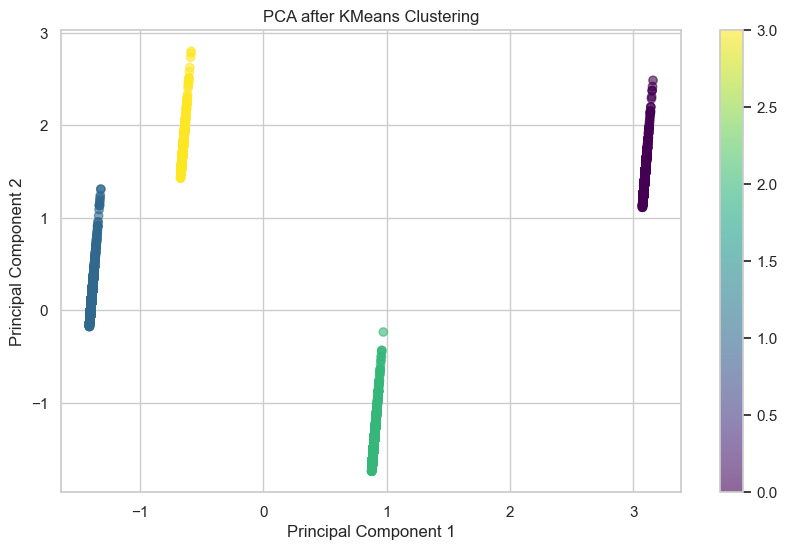

In [41]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
copy_data['cluster'] = kmeans.fit_predict(features_scaled)

# Calculate cluster characteristics
cluster_characteristics_kmeans = copy_data.groupby('cluster').mean()
print(cluster_characteristics_kmeans)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=copy_data['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA after KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

In [44]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
# df = pd.read_csv('your_data.csv')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean and lemmatize text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return tokens

# Create a dictionary to hold word counts
word_counts = {
    'asshole': {},
    'not_asshole': {}
}

# Process each post
for index, row in data.iterrows():
    # Combine title and body
    if(index %100 == 0):
        print(index, " out of ", len(data))
    full_text = str(row['title']) + " " + str(row['body'])
    # Preprocess text
    tokens = preprocess_text(full_text)
    # Count words based on tag
    tag = 'asshole' if row['is_asshole'] == 1 else 'not_asshole'
    for token in tokens:
        if token in word_counts[tag]:
            word_counts[tag][token] += 1
        else:
            word_counts[tag][token] = 1

# Print results or analyze further
print(word_counts['asshole'])
print(word_counts['not_asshole'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shahareliyahu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shahareliyahu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shahareliyahu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0  out of  10453
100  out of  10453
200  out of  10453
300  out of  10453
400  out of  10453
500  out of  10453
600  out of  10453
700  out of  10453
800  out of  10453
900  out of  10453
1000  out of  10453
1100  out of  10453
1200  out of  10453
1300  out of  10453
1400  out of  10453
1500  out of  10453
1600  out of  10453
1700  out of  10453
1800  out of  10453
1900  out of  10453
2000  out of  10453
2100  out of  10453
2200  out of  10453
2300  out of  10453
2400  out of  10453
2500  out of  10453
2600  out of  10453
2700  out of  10453
2800  out of  10453
2900  out of  10453
3000  out of  10453
3100  out of  10453
3200  out of  10453
3300  out of  10453
3400  out of  10453
3500  out of  10453
3600  out of  10453
3700  out of  10453
3800  out of  10453
3900  out of  10453
4000  out of  10453
4100  out of  10453
4200  out of  10453
4300  out of  10453
4400  out of  10453
4500  out of  10453
4600  out of  10453
4700  out of  10453
4800  out of  10453
4900  out of  10453
5000  out of

In [45]:
# save the results
import json
with open('word_counts.json', 'w') as f:
    json.dump(word_counts, f)
    

In [48]:
del  word_counts['asshole']['’']
del  word_counts['not_asshole']['’']

('friend', 'like', 'said', 'time', 'aita', 'would', 'get', 'im', 'told', 'want')


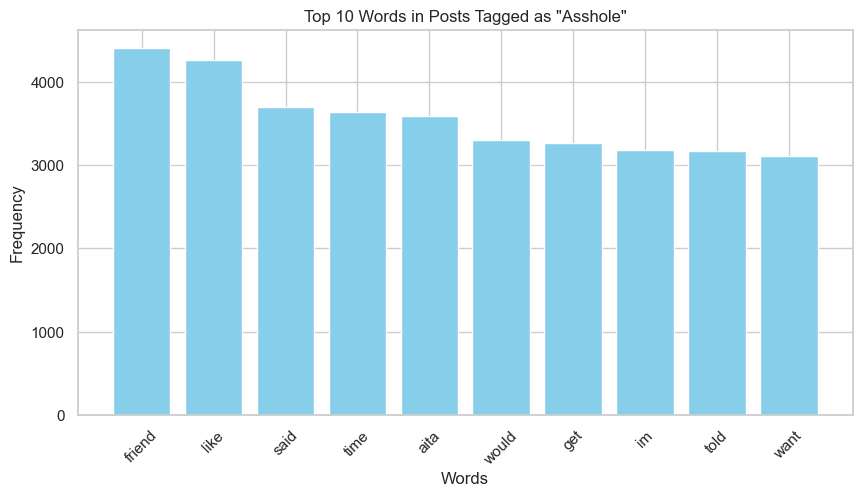

('like', 'friend', 'time', 'get', 'aita', 'im', 'want', 'would', 'told', 'said')


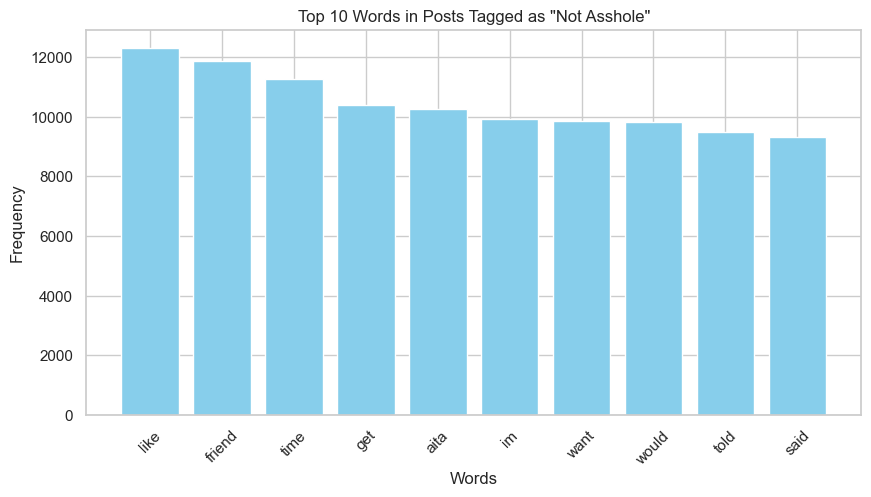

In [49]:
import matplotlib.pyplot as plt

def plot_top_words(word_counts, tag, title, n=10):
    """Function to plot top N words for a given tag."""
    # Sort the dictionary by frequency and pick the top N words
    top_words = sorted(word_counts[tag].items(), key=lambda x: x[1], reverse=True)[:n]
    words, counts = zip(*top_words)
    print(words)
    
    # Create a bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Words in Posts Tagged as "{title}"')
    plt.xticks(rotation=45)
    plt.show()

# Assuming 'word_counts' is already filled from the previous script
plot_top_words(word_counts, 'asshole', 'Asshole')
plot_top_words(word_counts, 'not_asshole', 'Not Asshole')


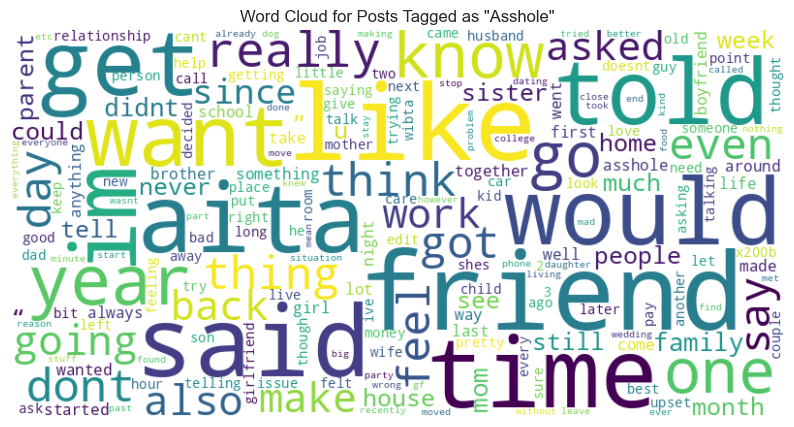

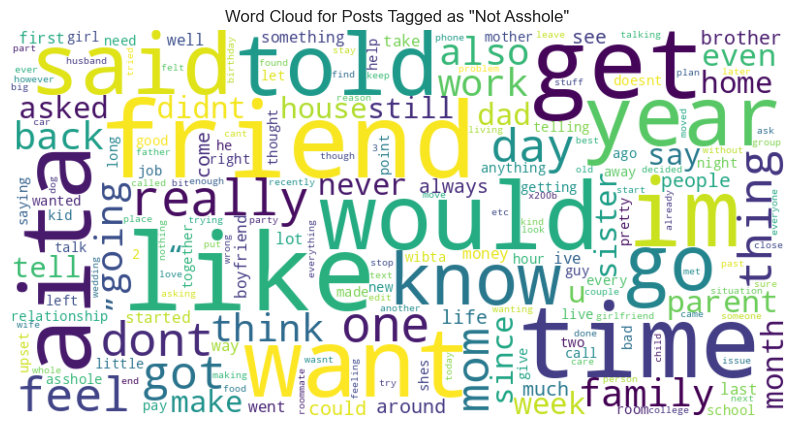

In [50]:
from wordcloud import WordCloud

def plot_word_cloud(word_counts, tag, title):
    """Function to generate a word cloud for a given tag."""
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(word_counts[tag])
    
    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for Posts Tagged as "{title}"')
    plt.axis('off')
    plt.show()

# Generate word clouds
plot_word_cloud(word_counts, 'asshole', 'Asshole')
plot_word_cloud(word_counts, 'not_asshole', 'Not Asshole')


In [66]:
filtered_word_count_by_rank = {}
dist = 10 # This can be adjusted to control how different the ranks need to be

# Assuming 'word_counts' is structured as {'asshole': {...}, 'not_asshole': {...}}
for category in word_counts.keys():
    # Create a sorted list of words based on frequency, highest frequency first
    ranked_words = sorted(word_counts[category].items(), key=lambda x: x[1], reverse=True)
    # Convert list of words to a dictionary that maps word to its rank
    rank_dict = {word: rank for rank, (word, count) in enumerate(ranked_words)}

    filtered_word_count_by_rank[category] = {}
    other_category = 'asshole' if category == 'not_asshole' else 'not_asshole'
    other_ranked_words = sorted(word_counts[other_category].items(), key=lambda x: x[1], reverse=True)
    other_rank_dict = {word: rank for rank, (word, count) in enumerate(other_ranked_words)}
    # Compare ranks between categories
    for word, rank in rank_dict.items():
        other_rank = other_rank_dict.get(word, float('inf'))  # Default to infinite rank if word not found
        if abs(rank - other_rank) > dist:
            filtered_word_count_by_rank[category][word] = word_counts[category][word]

# Print filtered results to verify
print(filtered_word_count_by_rank['asshole'])
print(filtered_word_count_by_rank['not_asshole'])


{'mom': 1660, 'people': 1490, 'parent': 1330, 'went': 1213, 'together': 1170, 'asshole': 1113, 'life': 1087, 'night': 1067, 'girl': 1050, 'good': 1032, 'guy': 1029, 'dad': 1028, 'shes': 1006, 'girlfriend': 994, 'need': 955, 'getting': 932, 'job': 921, 'money': 918, 'thought': 897, 'pretty': 861, 'he': 815, 'wife': 811, 'bit': 787, 'best': 782, 'pay': 777, 'wibta': 766, 'live': 739, 'came': 733, 'edit': 720, 'though': 697, 'next': 689, 'long': 683, 'new': 682, 'mother': 677, 'car': 672, 'husband': 663, 'issue': 637, 'sure': 625, 'give': 622, 'decided': 622, 'couple': 612, 'keep': 611, 'x200b': 607, 'feeling': 596, 'try': 596, 'look': 595, 'felt': 588, 'son': 587, 'recently': 581, 'wedding': 569, 'called': 567, 'problem': 564, 'leave': 561, 'everything': 545, 'wasnt': 542, 'stay': 536, 'making': 532, 'close': 532, 'move': 531, 'wrong': 530, 'gf': 530, 'tried': 512, 'daughter': 511, 'party': 506, 'without': 504, 'big': 500, 'food': 494, 'minute': 490, 'etc': 483, 'mean': 477, 'knew': 474,

('mom', 'people', 'parent', 'went', 'together', 'asshole', 'life', 'night', 'girl', 'good')


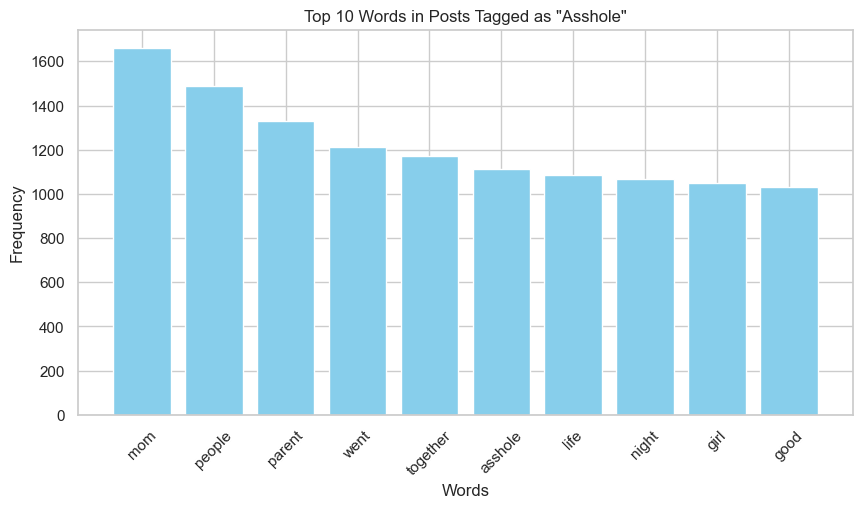

('mom', 'parent', 'dad', 'people', 'life', 'money', 'went', 'job', 'need', 'together')


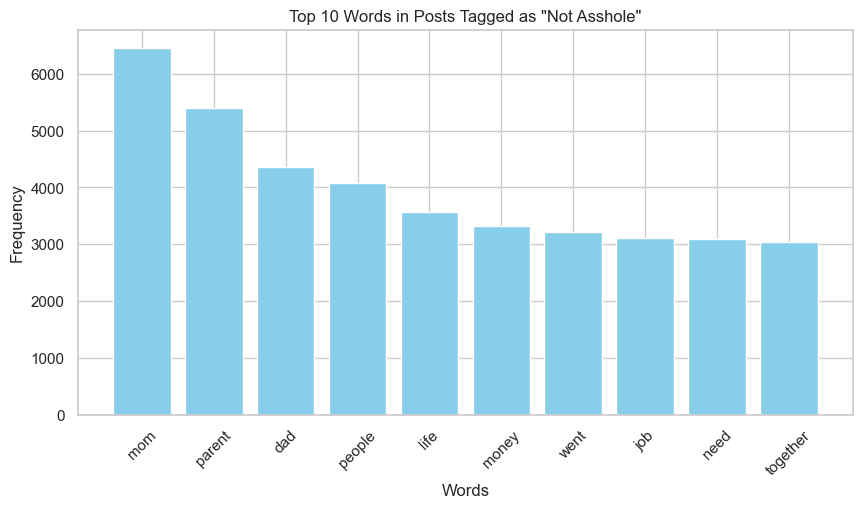

In [67]:
import matplotlib.pyplot as plt

def plot_top_words(word_counts, tag, title, n=10):
    """Function to plot top N words for a given tag."""
    # Sort the dictionary by frequency and pick the top N words
    top_words = sorted(word_counts[tag].items(), key=lambda x: x[1], reverse=True)[:n]
    words, counts = zip(*top_words)
    print(words)
    
    # Create a bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Words in Posts Tagged as "{title}"')
    plt.xticks(rotation=45)
    plt.show()

# Assuming 'word_counts' is already filled from the previous script
plot_top_words(filtered_word_count_by_rank, 'asshole', 'Asshole')
plot_top_words(filtered_word_count_by_rank, 'not_asshole', 'Not Asshole')


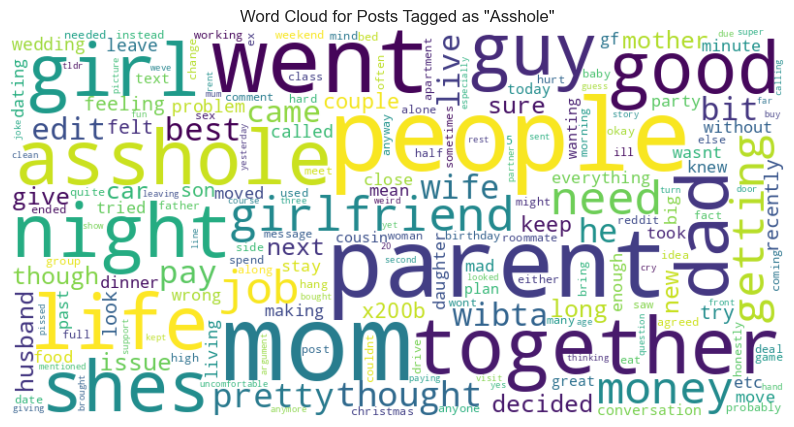

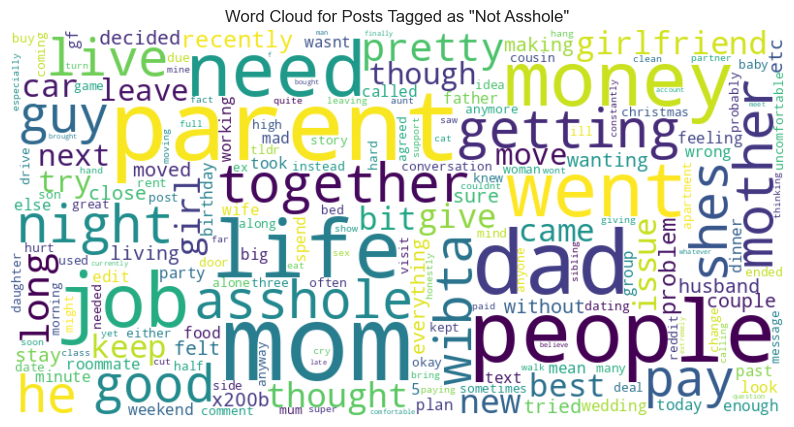

In [68]:
from wordcloud import WordCloud

def plot_word_cloud(word_counts, tag, title):
    """Function to generate a word cloud for a given tag."""
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(word_counts[tag])
    
    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for Posts Tagged as "{title}"')
    plt.axis('off')
    plt.show()

# Generate word clouds
plot_word_cloud(filtered_word_count_by_rank, 'asshole', 'Asshole')
plot_word_cloud(filtered_word_count_by_rank, 'not_asshole', 'Not Asshole')
